<a href="https://colab.research.google.com/github/wwchiam/DeepFakeDetect/blob/main/Deepfake_Detection_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Understanding (EDA)

In [1]:
!nvidia-smi

Wed Dec 25 07:16:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

### a) Data Distribution

In [ ]:
# Declare images path
Ori_DFD = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection'
Ori_youtube = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube'

Fake_DFD = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection'
Fake_Deepfakes = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes'
Fake_Faceswap = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap'
Fake_NeuralTexture = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures'
Fake_FaceShifter = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter'
Fake_Face2Face = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face'

In [ ]:
import os

def count_files(directory):
  try:
    file_count = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
    return file_count
  except FileNotFoundError:
    print(f"Directory not found: {directory}")
    return 0


# Count files in each directory
print(f"Original DFD: {count_files(Ori_DFD)} files")
print(f"Original YouTube: {count_files(Ori_youtube)} files")
print(f"Fake DFD: {count_files(Fake_DFD)} files")
print(f"Fake Deepfakes: {count_files(Fake_Deepfakes)} files")
print(f"Fake Faceswap: {count_files(Fake_Faceswap)} files")
print(f"Fake NeuralTexture: {count_files(Fake_NeuralTexture)} files")
print(f"Fake FaceShifter: {count_files(Fake_FaceShifter)} files")
print(f"Fake Face2Face: {count_files(Fake_Face2Face)} files")

Original DFD: 3630 files
Original YouTube: 9990 files
Fake DFD: 9934 files
Fake Deepfakes: 9970 files
Fake Faceswap: 9997 files
Fake NeuralTexture: 10000 files
Fake FaceShifter: 9998 files
Fake Face2Face: 10000 files


### b) Visual Inspection

Displaying one image from Original_DFD:


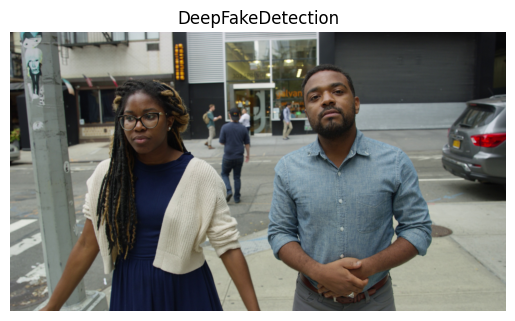

Displaying one image from Original_Youtube:


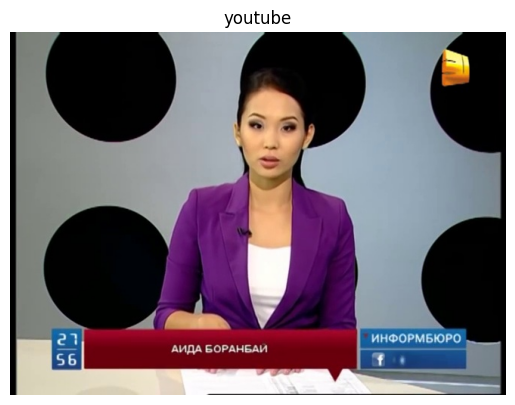

Displaying one image from Fake_DFD:


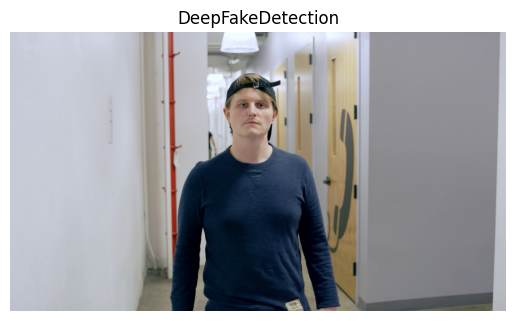

Displaying one image from Fake_Deepfakes:


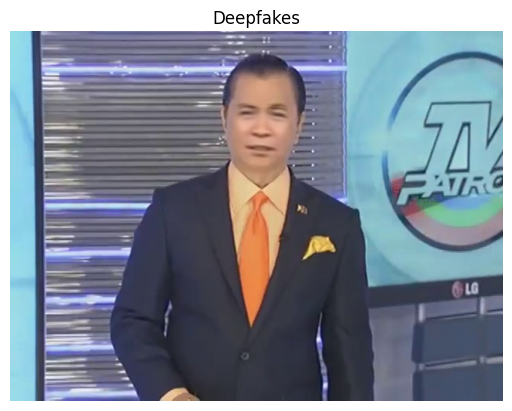

Displaying one image from Fake_Faceswap:


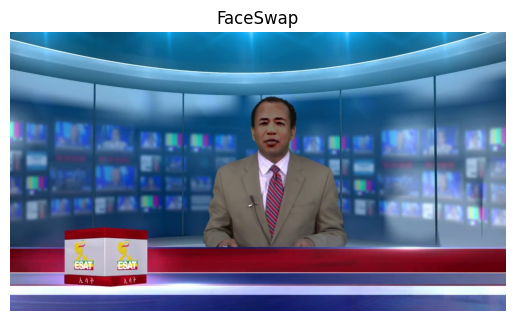

Displaying one image from Fake_NeuralTexture:


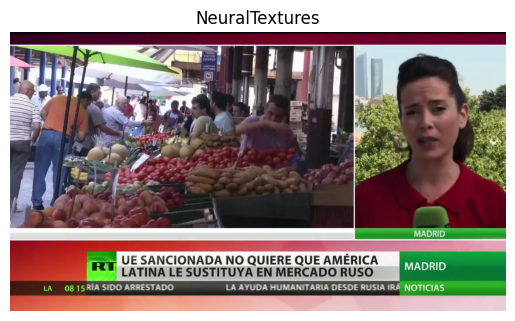

Displaying one image from Fake_FaceShifter:


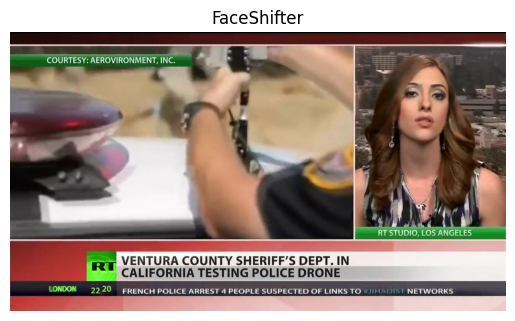

Displaying one image from Fake_Face2Face:


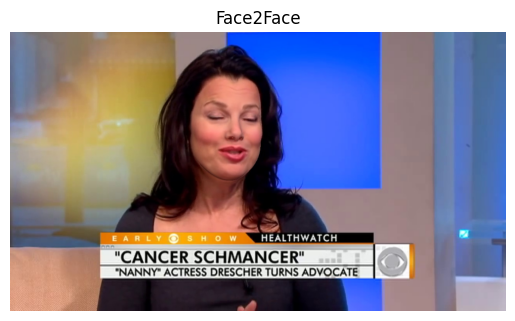

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

categories = {
    "Original_DFD": '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection',
    "Original_Youtube": '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube',
    "Fake_DFD": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection',
    "Fake_Deepfakes": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes',
    "Fake_Faceswap": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap',
    "Fake_NeuralTexture": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures',
    "Fake_FaceShifter": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter',
    "Fake_Face2Face": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face',
}

# Function to display a single image from a folder
def display_one_image(directory):
    all_files = []
    for root, _, files in os.walk(directory):
        all_files.extend([os.path.join(root, file) for file in files if file.endswith(('.png', '.jpg', '.jpeg'))])

    if not all_files:
        print(f"No images found in {directory}")
        return None

    image_path = random.choice(all_files)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(directory))
    plt.show()

# Display one image from each category
for category, path in categories.items():
    print(f"Displaying one image from {category}:")
    display_one_image(path)

Processing category: Original_DFD
Processing images in /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection
Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection/17__exit_phone_room_frame1.jpg


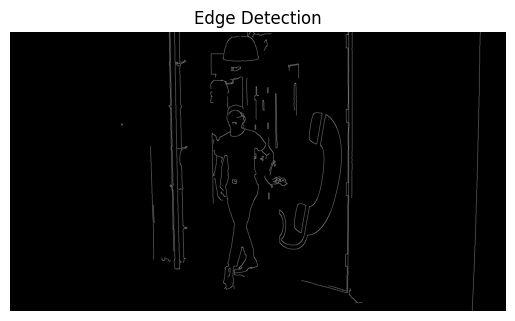

Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection/17__exit_phone_room_frame2.jpg


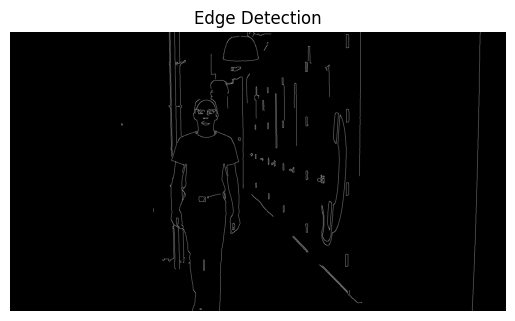

Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection/17__exit_phone_room_frame3.jpg


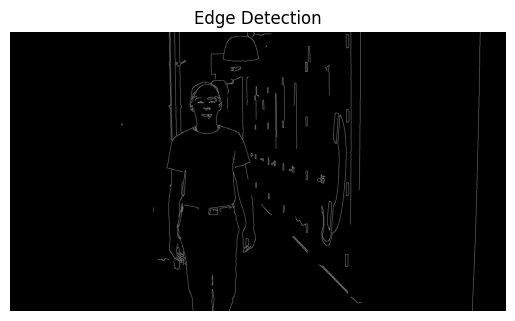

Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection/17__exit_phone_room_frame4.jpg


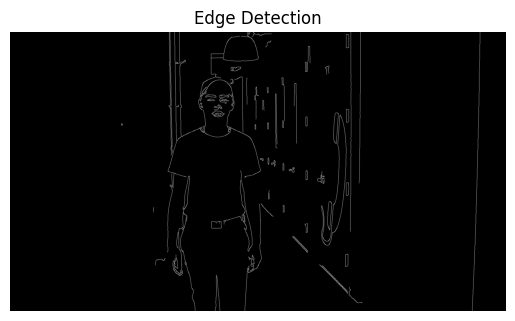

Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection/17__exit_phone_room_frame5.jpg


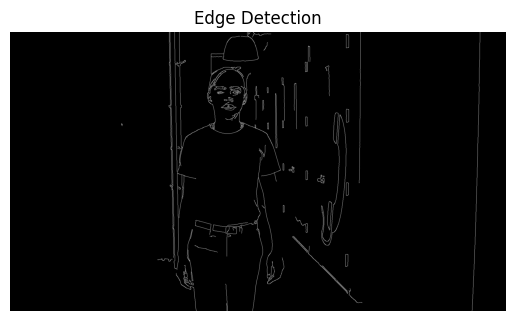

Processing category: Original_Youtube
Processing images in /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube
Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/242_frame1.jpg


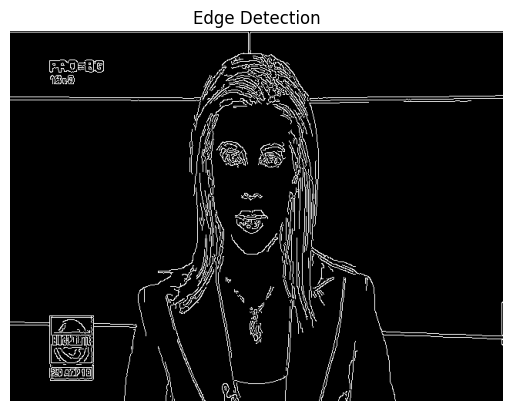

Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/242_frame2.jpg


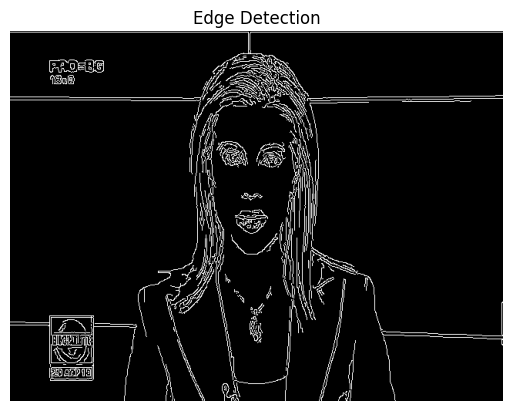

Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/242_frame3.jpg


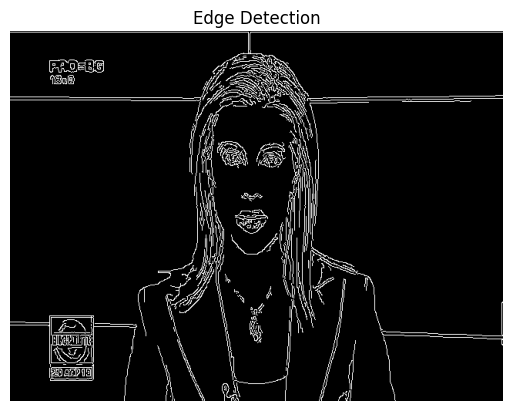

Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/242_frame4.jpg


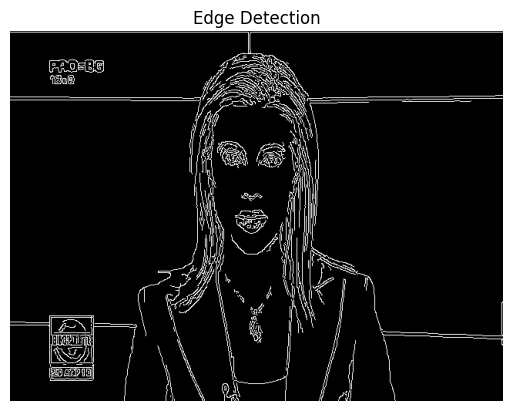

Processing /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/242_frame5.jpg


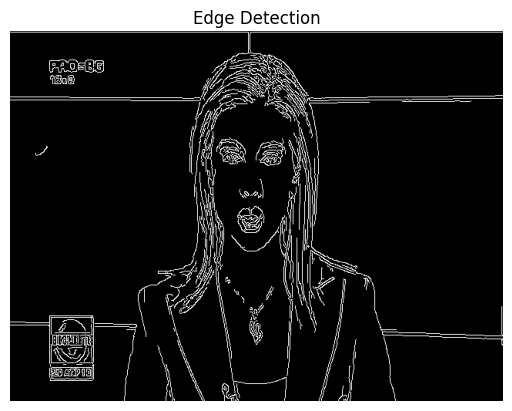

Processing category: Fake_DFD
Processing images in /content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection
Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/19_24__walk_down_hall_angry__W1DEM0XM_frame1.jpg


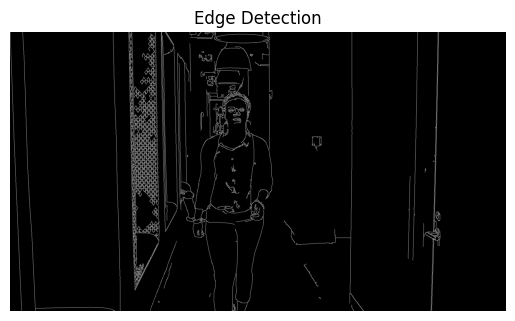

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/19_24__walk_down_hall_angry__W1DEM0XM_frame2.jpg


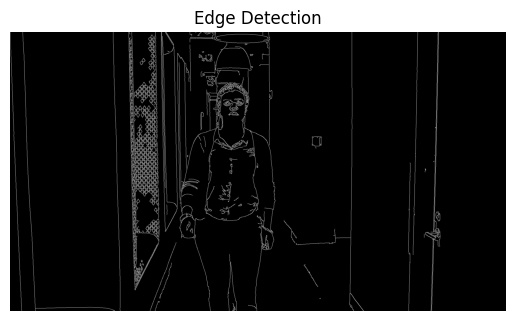

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/19_24__walk_down_hall_angry__W1DEM0XM_frame3.jpg


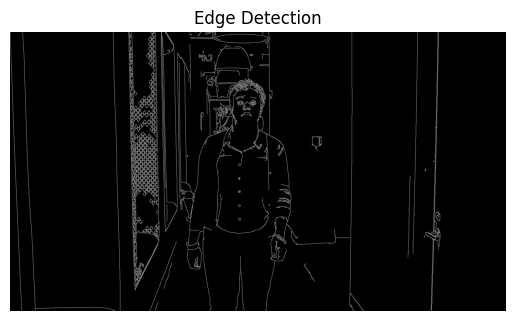

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/19_24__walk_down_hall_angry__W1DEM0XM_frame4.jpg


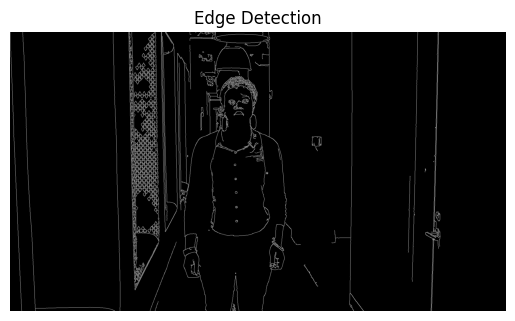

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/19_24__walk_down_hall_angry__W1DEM0XM_frame5.jpg


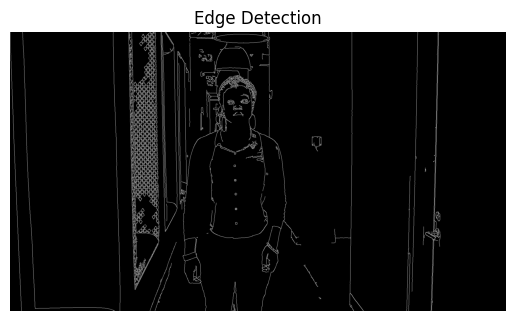

Processing category: Fake_Deepfakes
Processing images in /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes
Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/936_931_frame7.jpg


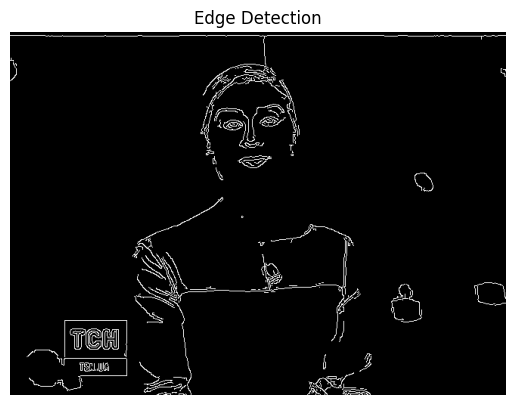

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/936_931_frame8.jpg


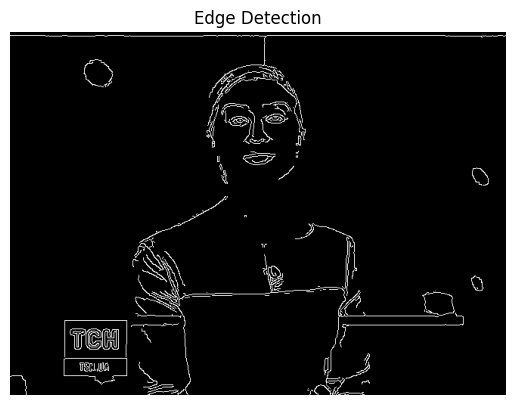

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/936_931_frame9.jpg


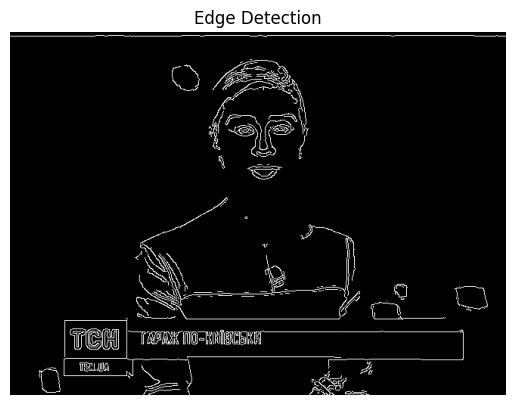

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/936_931_frame10.jpg


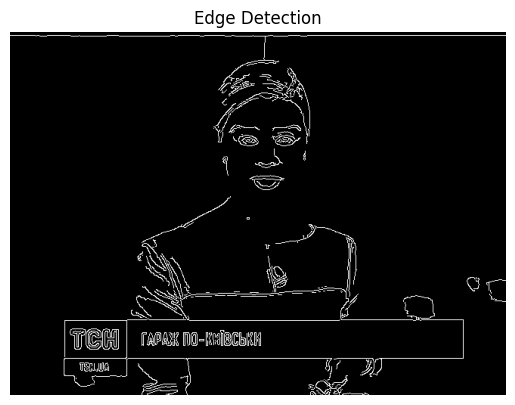

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/233_995_frame1.jpg


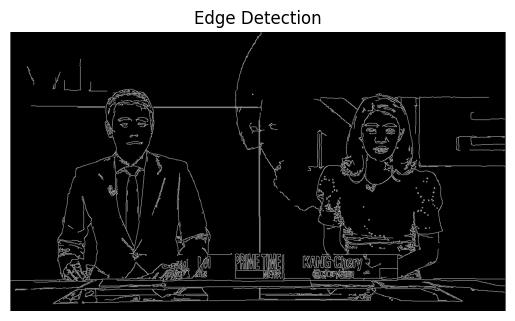

Processing category: Fake_Faceswap
Processing images in /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap
Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/445_494_frame1.jpg


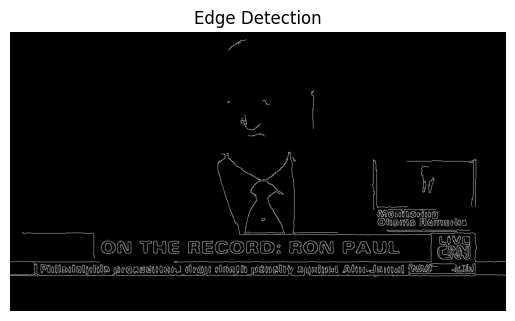

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/445_494_frame2.jpg


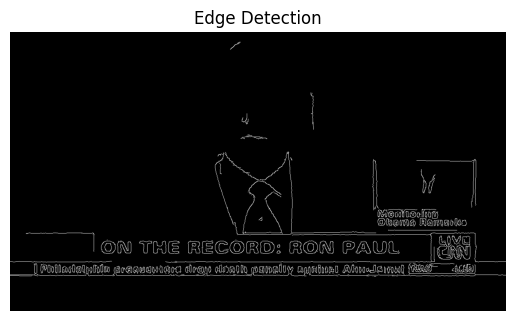

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/445_494_frame3.jpg


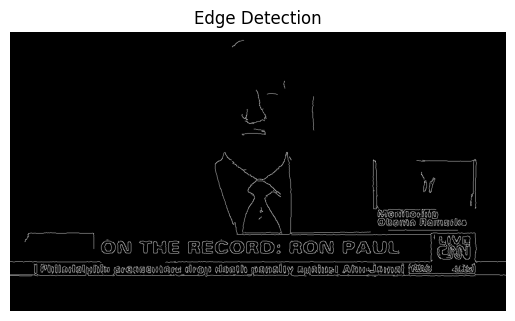

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/445_494_frame4.jpg


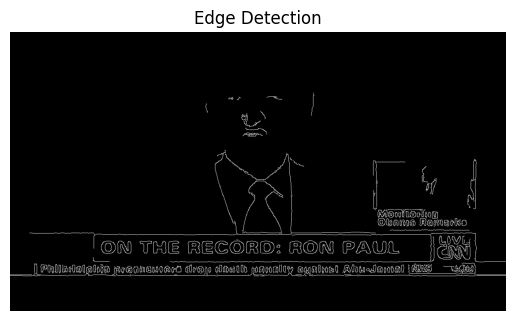

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/445_494_frame5.jpg


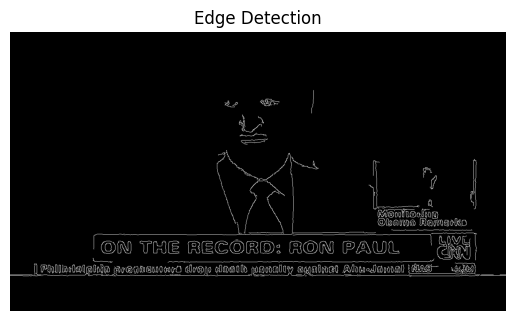

Processing category: Fake_NeuralTexture
Processing images in /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures
Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/714_842_frame1.jpg


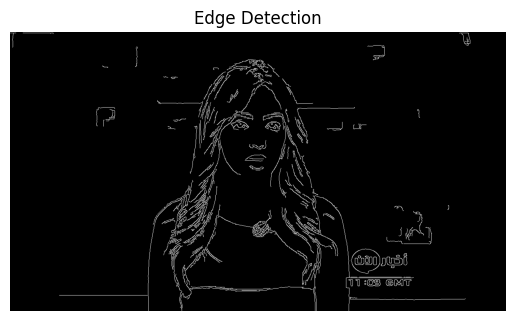

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/714_842_frame2.jpg


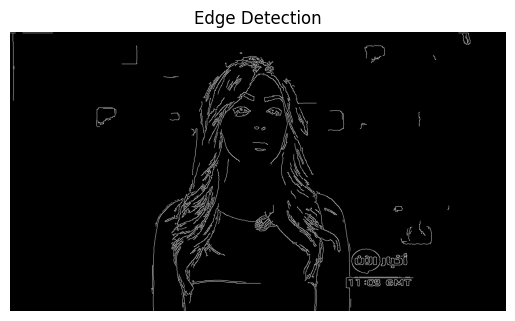

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/714_842_frame3.jpg


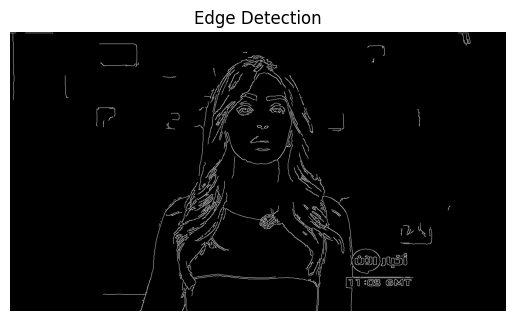

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/714_842_frame4.jpg


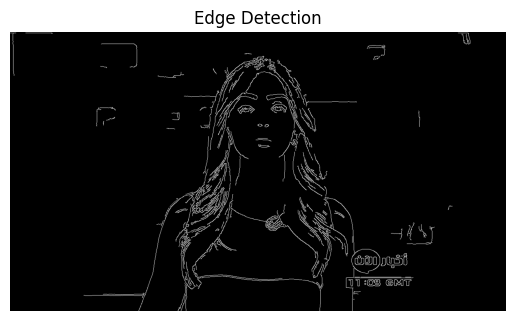

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/714_842_frame5.jpg


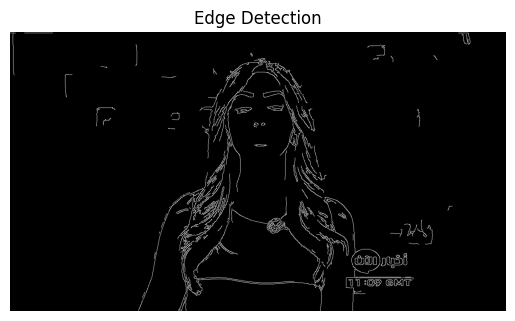

Processing category: Fake_FaceShifter
Processing images in /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter
Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/601_653_frame1.jpg


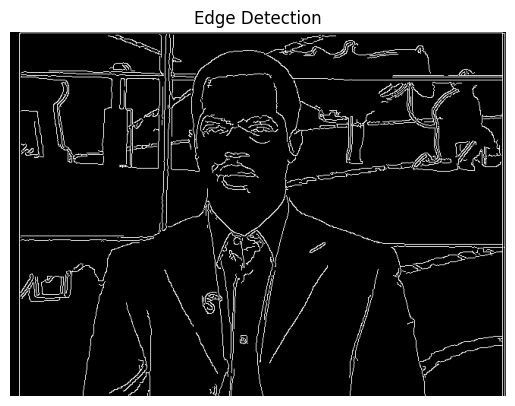

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/601_653_frame2.jpg


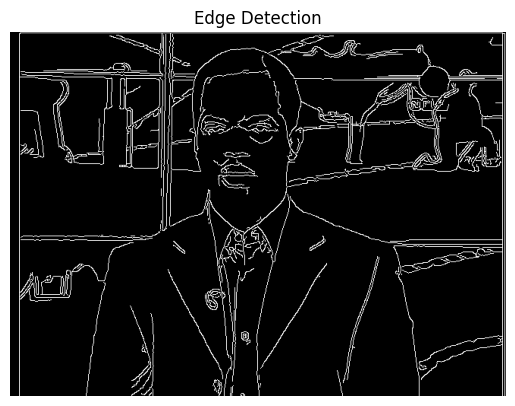

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/601_653_frame3.jpg


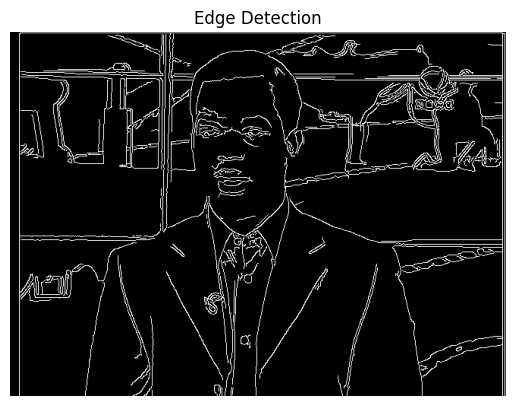

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/601_653_frame4.jpg


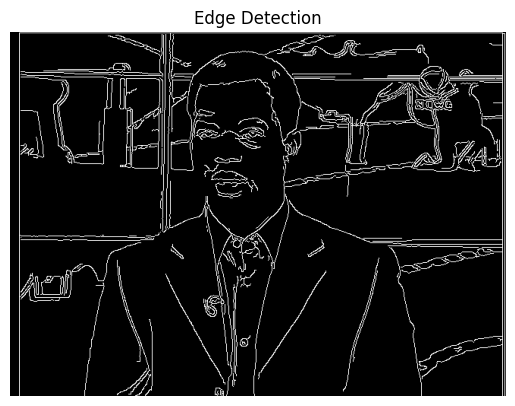

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/601_653_frame5.jpg


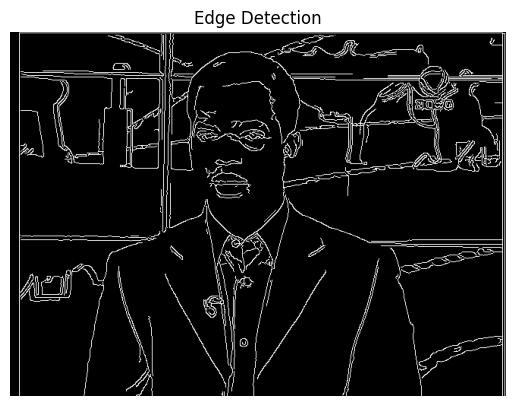

Processing category: Fake_Face2Face
Processing images in /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face
Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/325_492_frame1.jpg


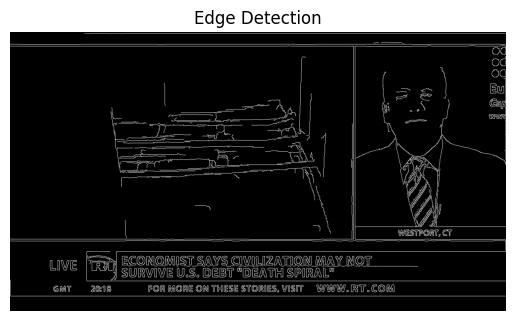

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/325_492_frame2.jpg


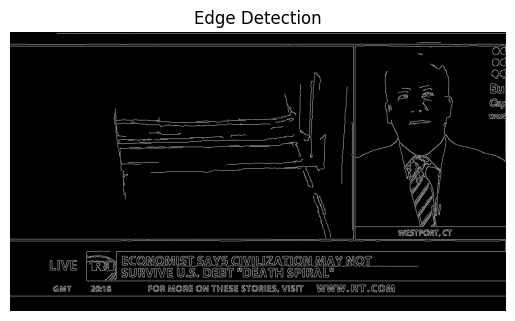

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/325_492_frame3.jpg


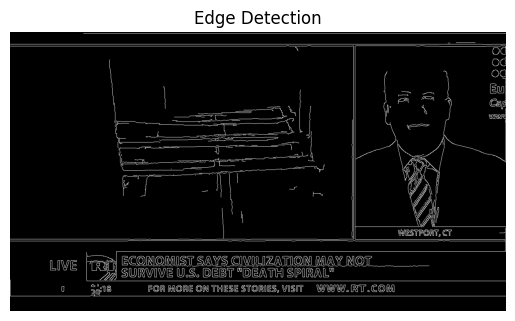

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/325_492_frame4.jpg


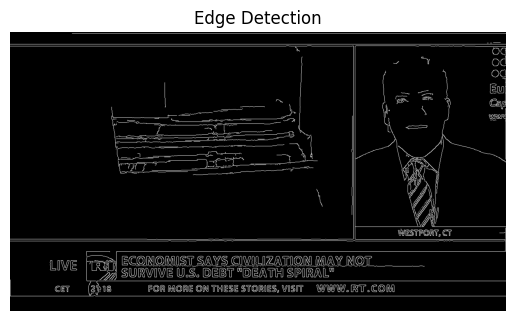

Processing /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/325_492_frame5.jpg


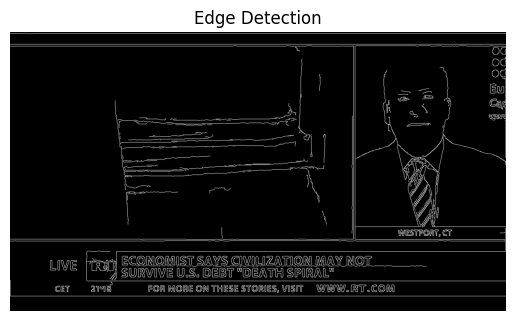

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Directories for each category
categories = {
    "Original_DFD": '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection',
    "Original_Youtube": '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube',
    "Fake_DFD": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection',
    "Fake_Deepfakes": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes',
    "Fake_Faceswap": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap',
    "Fake_NeuralTexture": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures',
    "Fake_FaceShifter": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter',
    "Fake_Face2Face": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face',
}

# Function to detect edges in an image
def detect_edges(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, threshold1=50, threshold2=150)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.axis('off')
    plt.show()

# Function to apply edge detection for all images in a folder
def process_all_images_in_folder(directory):
    all_files = []
    for root, _, files in os.walk(directory):
        all_files.extend([os.path.join(root, file) for file in files if file.endswith(('.png', '.jpg', '.jpeg'))])

    if not all_files:
        print(f"No images found in {directory}")
        return

    print(f"Processing images in {directory}")
    for image_path in all_files[:5]:  # Limit to first 5 images for demonstration
        print(f"Processing {image_path}")
        detect_edges(image_path)

# Process all images in each category
for category, path in categories.items():
    print(f"Processing category: {category}")
    process_all_images_in_folder(path)

Found 585_599_frame6.jpg in Fake_Deepfakes at /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/585_599_frame6.jpg


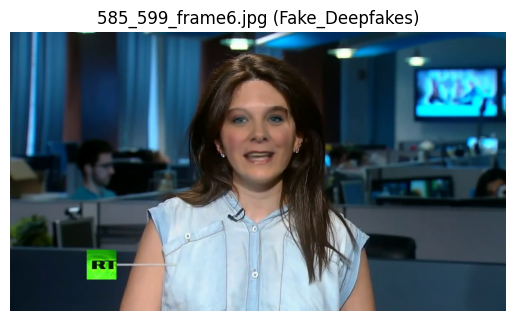

Found 585_599_frame6.jpg in Fake_Faceswap at /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/585_599_frame6.jpg


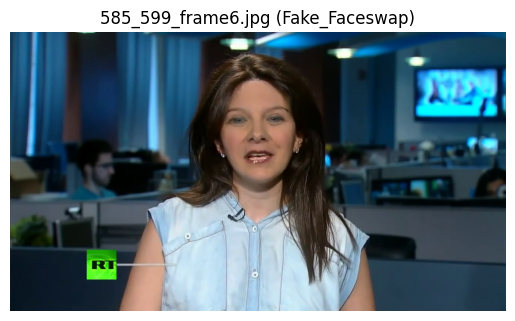

Found 585_599_frame6.jpg in Fake_NeuralTexture at /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/585_599_frame6.jpg


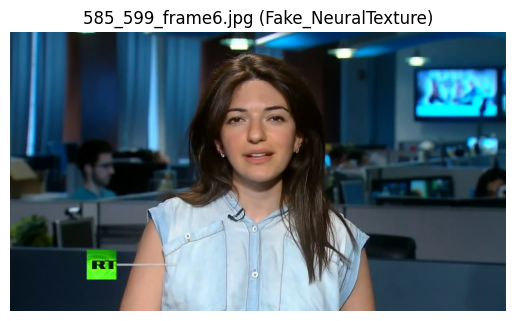

Found 585_599_frame6.jpg in Fake_FaceShifter at /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/585_599_frame6.jpg


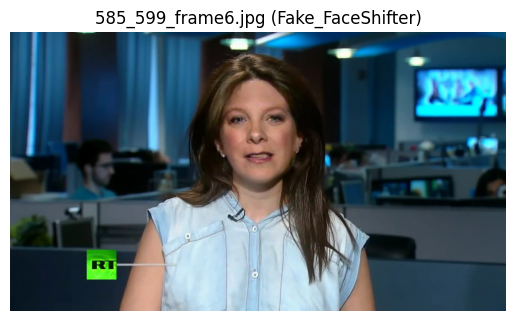

Found 585_599_frame6.jpg in Fake_Face2Face at /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/585_599_frame6.jpg


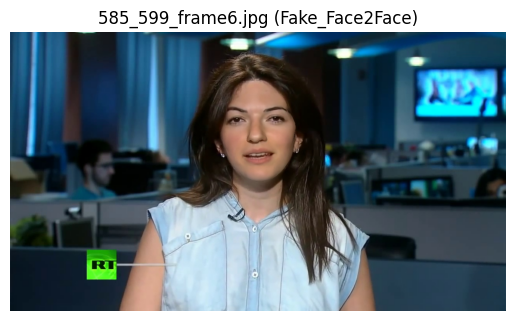

Found 585_frame6.jpg in Original_Youtube at /content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/585_frame6.jpg


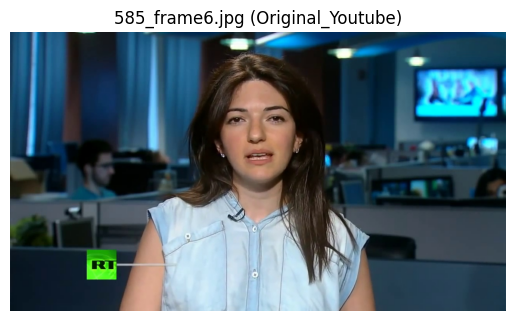

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Directories for each category
categories = {
    "Original_DFD": '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection',
    "Original_Youtube": '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube',
    "Fake_DFD": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection',
    "Fake_Deepfakes": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes',
    "Fake_Faceswap": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap',
    "Fake_NeuralTexture": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures',
    "Fake_FaceShifter": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter',
    "Fake_Face2Face": '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face',
}

# Function to display a specific image by name in all categories
def display_specific_image_in_all_categories(file_name, directories):
    found = False
    for category, directory in directories.items():
        for root, _, files in os.walk(directory):
            if file_name in files:
                image_path = os.path.join(root, file_name)
                print(f"Found {file_name} in {category} at {image_path}")
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(img)
                plt.title(f"{file_name} ({category})")
                plt.axis('off')
                plt.show()
                found = True
    if not found:
        print(f"File {file_name} not found in any of the provided directories.")

# Display the specific image in all categories
display_specific_image_in_all_categories("585_599_frame6.jpg", categories)
display_specific_image_in_all_categories("585_frame6.jpg", categories)

Processing: /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/585_599_frame6.jpg


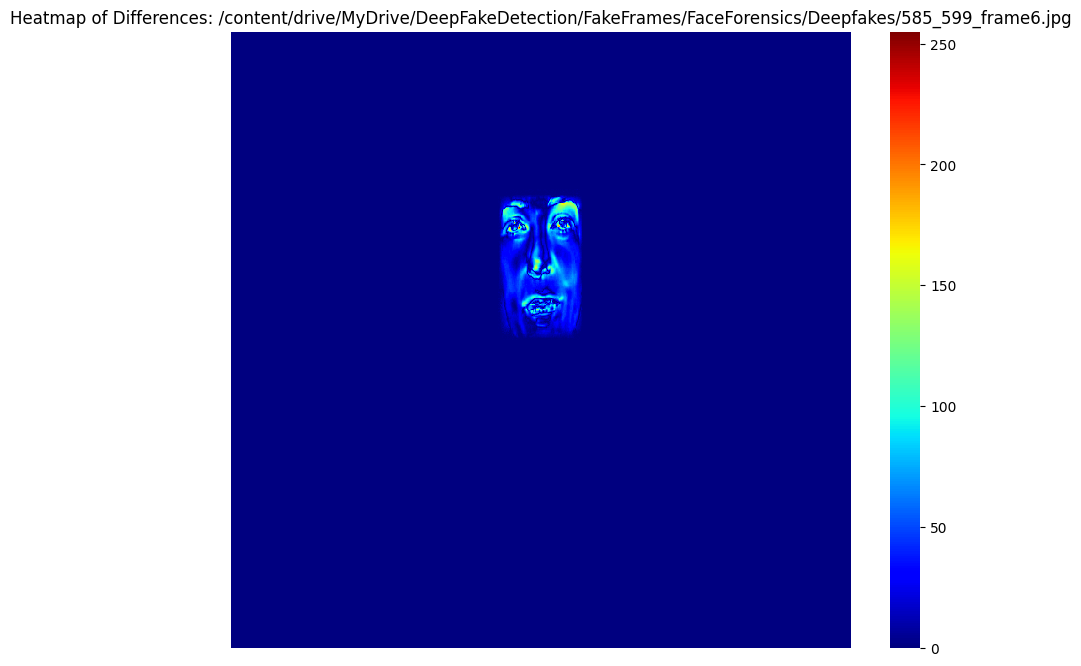

Processing: /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/585_599_frame6.jpg


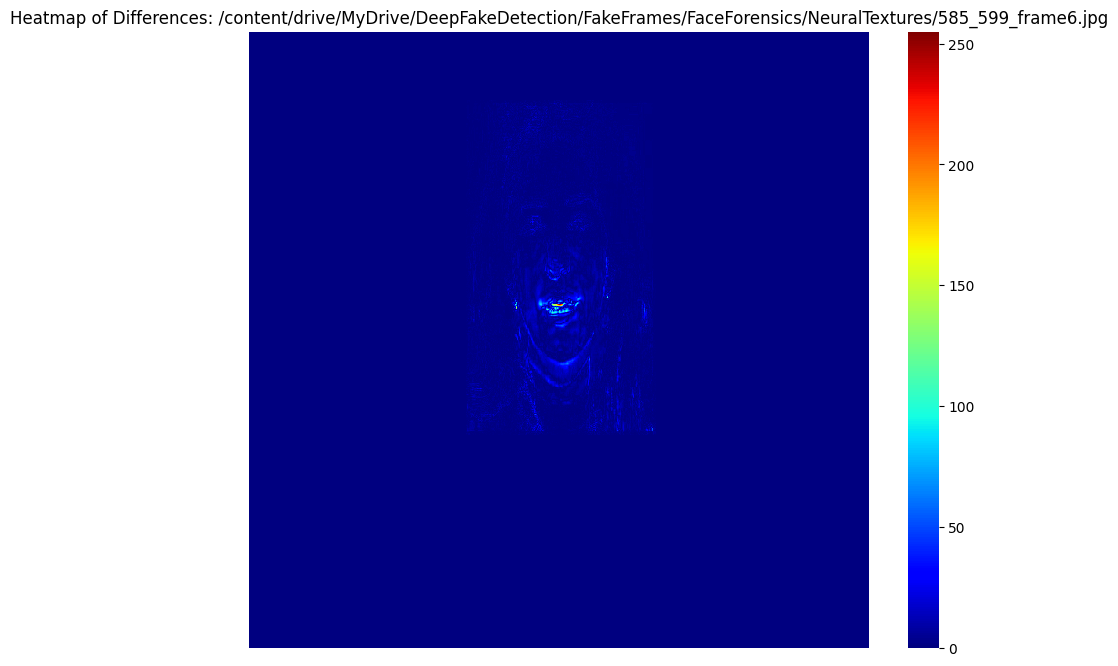

Processing: /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/585_599_frame6.jpg


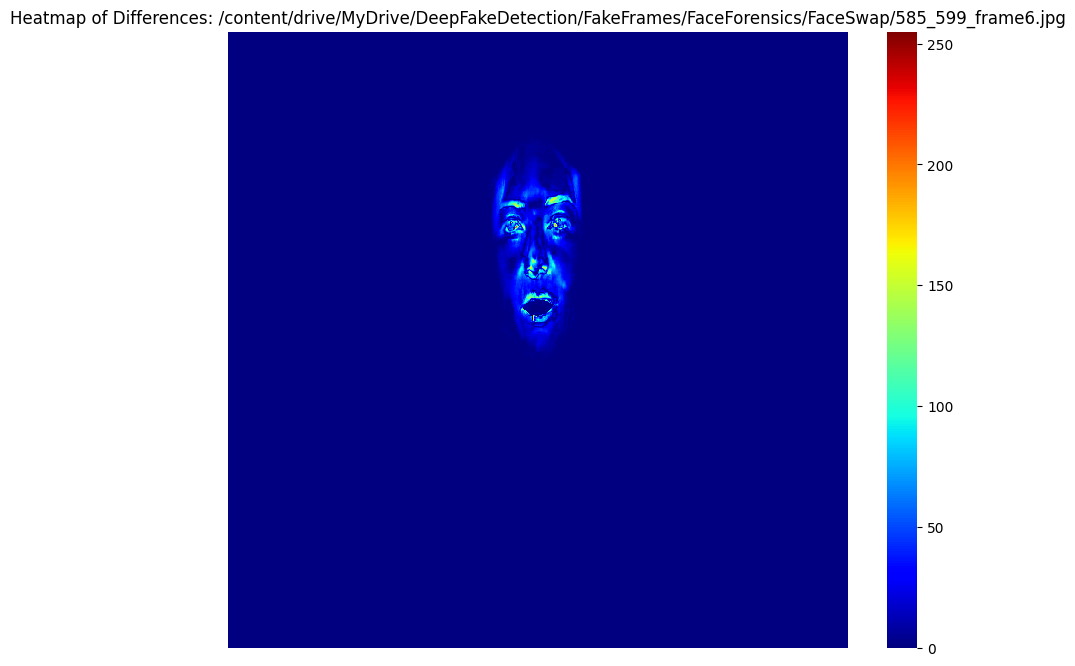

Processing: /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/585_599_frame6.jpg


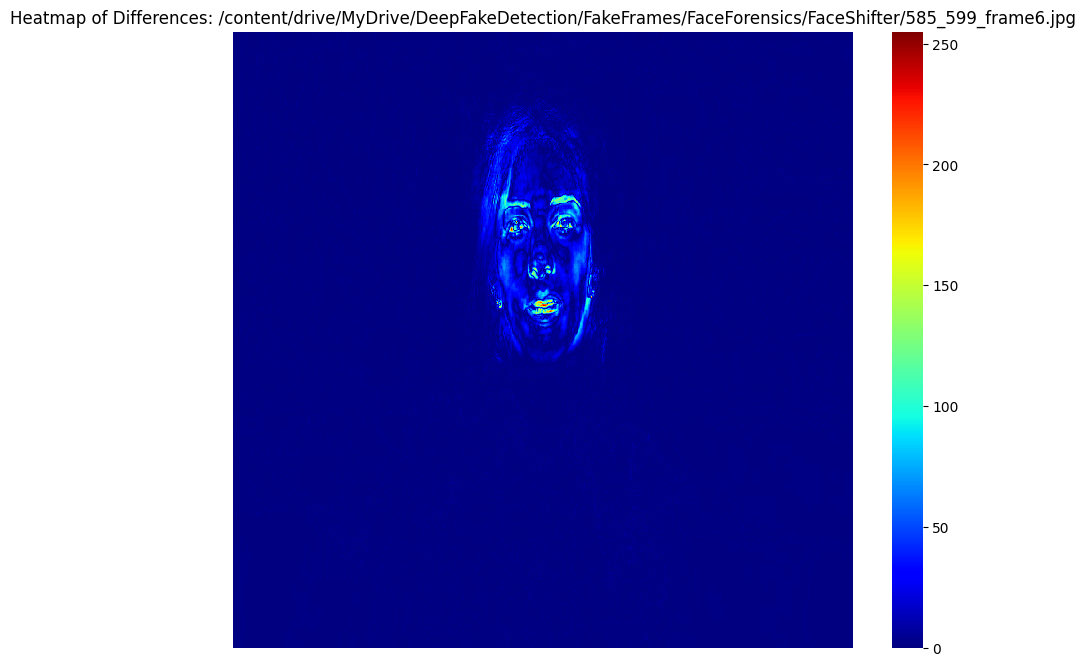

Processing: /content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/585_599_frame6.jpg


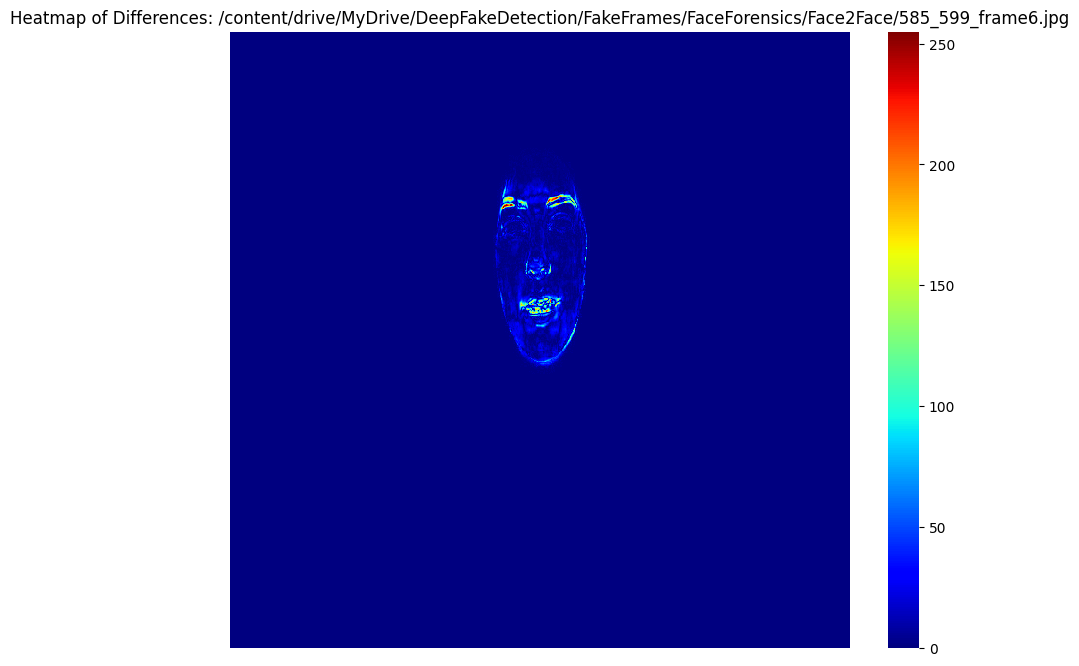

In [ ]:
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt

# Function to generate and display a heatmap for image differences
def generate_heatmap(fake_image_path, original_image_path):
    # Read the images
    fake_img = cv2.imread(fake_image_path, cv2.IMREAD_GRAYSCALE)
    original_img = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

    # Ensure both images are the same size
    if fake_img.shape != original_img.shape:
        print(f"Images {fake_image_path} and {original_image_path} are not of the same dimensions!")
        return

    # Calculate absolute difference between fake and original
    diff = cv2.absdiff(fake_img, original_img)

    # Normalize the difference for better visualization
    normalized_diff = (diff / diff.max()) * 255

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(normalized_diff, cmap='jet', cbar=True)
    plt.title(f"Heatmap of Differences: {fake_image_path}")
    plt.axis('off')
    plt.show()

# Original image path
original_image_path = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/585_frame6.jpg'

# Fake image paths
fake_image_paths = [
    '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/585_599_frame6.jpg',
    '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/585_599_frame6.jpg',
    '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/585_599_frame6.jpg',
    '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/585_599_frame6.jpg',
    '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/585_599_frame6.jpg',
]

# Generate heatmaps for all fake images
for fake_image_path in fake_image_paths:
    print(f"Processing: {fake_image_path}")
    generate_heatmap(fake_image_path, original_image_path)


# 3. Data Preparation

### a) Consolidate into one dataset

In [ ]:
import os
import random
import pandas as pd

# Define directories for each category
Ori_DFD = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection'
Ori_youtube = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube'

Fake_DFD = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection'
Fake_Deepfakes = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes'
Fake_Faceswap = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap'
Fake_NeuralTexture = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures'
Fake_FaceShifter = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter'
Fake_Face2Face = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face'

# Original DFD: 3630 files
# Original YouTube: 9990 files
# Fake DFD: 9934 files
# Fake Deepfakes: 9970 files
# Fake Faceswap: 9997 files
# Fake NeuralTexture: 10000 files
# Fake FaceShifter: 9998 files
# Fake Face2Face: 10000 files


# Directories and sampling rules
sampling_rules = {
    "Ori_DFD": (Ori_DFD, 360, 2, 0),
    "Ori_YouTube": (Ori_youtube, 990, 2, 0),
    "Fake_DFD": (Fake_DFD, 900, 2, 1),
    "Fake_Deepfakes": (Fake_Deepfakes, 900, 2, 1),
    "Fake_Faceswap": (Fake_Faceswap, 900, 2, 1),
    "Fake_NeuralTexture": (Fake_NeuralTexture, 900, 2, 1),
    "Fake_FaceShifter": (Fake_FaceShifter, 900, 2, 1),
    "Fake_Face2Face": (Fake_Face2Face, 900, 2, 1),
}

# Function to collect frames for videos and return a dictionary
def collect_frames(video_folder):
    frames = os.listdir(video_folder)
    frame_dict = {}

    # Group frames by base video name
    for frame in frames:
        base_name = frame.split('_frame')[0]  # Extract the video base name
        if base_name not in frame_dict:
            frame_dict[base_name] = []  # Create a list for each video base name
        frame_dict[base_name].append(os.path.join(video_folder, frame))  # Add the frame path

    return frame_dict

# Function to select videos and their respective frames
def select_videos_and_frames(frames_dict, num_videos, num_frames_per_video, label):
    selected_data = []
    selected_video_names = random.sample(list(frames_dict.keys()), num_videos)

    for video_name in selected_video_names:
        frames = frames_dict[video_name]
        # Randomly select num_frames_per_video frames from the available frames
        selected_frames = random.sample(frames, min(len(frames), num_frames_per_video))
        for frame_path in selected_frames:
            selected_data.append((frame_path, label))  # Use the passed label

    return selected_data

# Create a list to hold all frame paths and their labels
data = []

# Process each category based on sampling rules
for category, (folder_path, num_videos, num_frames, label) in sampling_rules.items():
    print(f"Processing {category}...")
    frames_dict = collect_frames(folder_path)
    data += select_videos_and_frames(frames_dict, num_videos, num_frames, label)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['image_path', 'label'])

# Display the DataFrame
print("Data collection complete. Sample data:")
print(df.head())

# Save the DataFrame to a CSV file
csv_path = '/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v3.csv'
df.to_csv(csv_path, index=False)
print(f"Dataset saved to {csv_path}")


Processing Ori_DFD...
Processing Ori_YouTube...
Processing Fake_DFD...
Processing Fake_Deepfakes...
Processing Fake_Faceswap...
Processing Fake_NeuralTexture...
Processing Fake_FaceShifter...
Processing Fake_Face2Face...
Data collection complete. Sample data:
                                          image_path  label
0  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
1  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
2  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
3  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
4  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
Dataset saved to /content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v3.csv


In [ ]:
new_csv_path = '/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v3.csv'
df.to_csv(new_csv_path, index=False)
print(f"Dataset saved to {new_csv_path}")

Dataset saved to /content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v3.csv


### b) Augmentation for true images

In [ ]:
import cv2
import albumentations as A
from tqdm import tqdm

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
# Augmentation pipelines for differential augmentation
augmentations1 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=20, p=0.5),
    A.GaussNoise(p=0.2),
    A.RandomGamma(p=0.2),
])

augmentations2 = A.Compose([
    A.VerticalFlip(p=0.3),  # Added vertical flip for more variety
    A.RandomBrightnessContrast(p=0.3),  # Increased contrast probability
    A.Rotate(limit=45, p=0.4),  # Wider rotation
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.6),
    A.GaussNoise(p=0.3),
    A.RandomGamma(p=0.3),
])

augmentations3 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=15, p=0.7),
    A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.02, rotate_limit=10, p=0.5),
    A.GaussNoise(p=0.1),
    A.RandomGamma(p=0.4),
])

In [ ]:
augmented_csv_path = '/content/drive/MyDrive/DeepFakeDetection/augmented_frames/augmented_real_images_v4.csv'


In [ ]:
import os
import cv2
import pandas as pd
from tqdm import tqdm


# Function to augment and save images
def augment_and_save_diff(image_path, label, output_dir, augmentation_pipes):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return []

    augmented_images = []

    # Apply each augmentation pipeline to the image
    for i, aug_pipeline in enumerate(augmentation_pipes):
        try:
            augmented = aug_pipeline(image=image)
            augmented_image = augmented['image']

            # Generate a unique filename for the augmented image
            image_name = os.path.splitext(os.path.basename(image_path))[0]
            augmented_image_name = f"{image_name}_aug_{i}.jpg"

            # Save the augmented image
            augmented_image_path = os.path.join(output_dir, augmented_image_name)
            cv2.imwrite(augmented_image_path, augmented_image)

            # Collect the augmented image path and label
            augmented_images.append((augmented_image_path, label))
        except Exception as e:
            print(f"Error during augmentation for {image_path} with pipeline {i}: {e}")

    return augmented_images

# Define augmentation pipelines
# Replace with valid Albumentations pipelines
augmentation_pipes = [augmentations1, augmentations2, augmentations3]

# Output directory for augmented images
augmented_dir = '/content/drive/MyDrive/DeepFakeDetection/augmented_frames_v3'
os.makedirs(augmented_dir, exist_ok=True)

# Filter real images
real_images = df[df['label'] == 0]

# Apply augmentation and save results
augmented_data = []
for idx, row in tqdm(real_images.iterrows(), total=real_images.shape[0], desc="Augmenting Images"):
    try:
        image_path = row['image_path']
        label = row['label']

        # Augment and save the image
        augmented_images = augment_and_save_diff(image_path, label, augmented_dir, augmentation_pipes)

        # Append augmented data to the list
        augmented_data.extend(augmented_images)
    except Exception as e:
        print(f"Error processing row {idx}: {e}")

# Convert augmented data to a DataFrame
aug_df = pd.DataFrame(augmented_data, columns=['image_path', 'label'])

# Save the augmented DataFrame
augmented_csv_path = '/content/drive/MyDrive/DeepFakeDetection/augmented_frames/augmented_real_images_v4.csv'
aug_df.to_csv(augmented_csv_path, index=False)

print(f"Augmented data saved to {augmented_csv_path}")


Augmenting Images: 100%|██████████| 2700/2700 [05:07<00:00,  8.77it/s]

Augmented data saved to /content/drive/MyDrive/DeepFakeDetection/augmented_frames/augmented_real_images_v4.csv


### c) Ensure balance dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v3.csv')
aug_df = pd.read_csv('/content/drive/MyDrive/DeepFakeDetection/augmented_frames/augmented_real_images_v4.csv')


print("Count of Real (label 0):", len(df[df['label'] == 0]))
print("Count of Fake (label 1):", len(df[df['label'] == 1]))

print("Count of Real (label 0):", len(aug_df[aug_df['label'] == 0]))
print("Count of Fake (label 1):", len(aug_df[aug_df['label'] == 1]))

Count of Real (label 0): 2700
Count of Fake (label 1): 10800
Count of Real (label 0): 8100
Count of Fake (label 1): 0


In [ ]:
# Combine original and augmented real datasets
real_data = pd.concat([df[df['label'] == 0], aug_df[aug_df['label'] == 0]], ignore_index=True)

# Confirm the counts
print("Total Real Samples (Original + Augmented):", len(real_data))


Total Real Samples (Original + Augmented): 10800


In [ ]:
# Filter fake samples
fake_data = df[df['label'] == 1]

# Combine real and fake datasets
balanced_df = pd.concat([real_data, fake_data], ignore_index=True)

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Confirm the balanced dataset counts
print("Balanced Dataset Counts:")
print("Real (label 0):", len(balanced_df[balanced_df['label'] == 0]))
print("Fake (label 1):", len(balanced_df[balanced_df['label'] == 1]))


Balanced Dataset Counts:
Real (label 0): 10800
Fake (label 1): 10800


### d) Saving Df for model training

In [ ]:
import pandas as pd

# Save the balanced DataFrame to a .pkl file
output_path = '/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v4.pkl'

balanced_df.to_pickle(output_path)

print(f"Balanced dataset saved to {output_path}")


Balanced dataset saved to /content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v4.pkl


### e) Spliting the data into test, train, validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Seed
SEED = 42
MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Load and preprocess dataset
df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v4.pkl')
df['label'] = df['label'].astype(str)

# Splitting data: 70% train, 20% test, 10% validation
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED)
val_df, test_df = train_test_split(temp_df, test_size=2/3, random_state=SEED)

# Verify split sizes
print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Testing set: {len(test_df)} samples")


Training set: 15120 samples
Validation set: 2160 samples
Testing set: 4320 samples


### f) Rescale images

In [ ]:
# Import all necessary libraries

import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 4. Modeling

#### a) Baseline Model

In [ ]:
# ImageDataGenerator initialization with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)


Found 15120 validated image filenames belonging to 2 classes.
Found 2160 validated image filenames belonging to 2 classes.
Found 4320 validated image filenames belonging to 2 classes.


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG16...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


473/473 ━━━━━━━━━━━━━━━━━━━━ 4131s 9s/step - accuracy: 0.5504 - loss: 0.7476 - val_accuracy: 0.6810 - val_loss: 0.6321
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 354s 738ms/step - accuracy: 0.6476 - loss: 0.6398 - val_accuracy: 0.6981 - val_loss: 0.5904
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 352s 734ms/step - accuracy: 0.6826 - loss: 0.6103 - val_accuracy: 0.6764 - val_loss: 0.6113
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 351s 731ms/step - accuracy: 0.7012 - loss: 0.5880 - val_accuracy: 0.7185 - val_loss: 0.5592
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 352s 733ms/step - accuracy: 0.7096 - loss: 0.5667 - val_accuracy: 0.7282 - val_loss: 0.5438
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 321s 667ms/step - accuracy: 0.7237 - loss: 0.5559 - val_accuracy: 0.7384 - val_loss: 0.5404
Epoch 7/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 331s 689ms/step - accuracy: 0.7198 - loss: 0.5476 - val_accuracy: 0.7310 - val_loss: 0.5313
Epoch 8/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 344s 715ms/step - accuracy: 0.7347 - loss: 0.5358

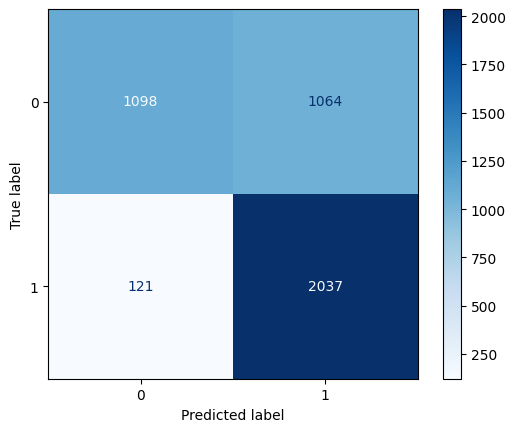

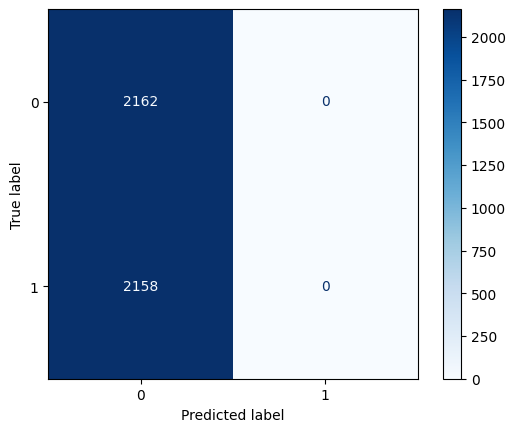

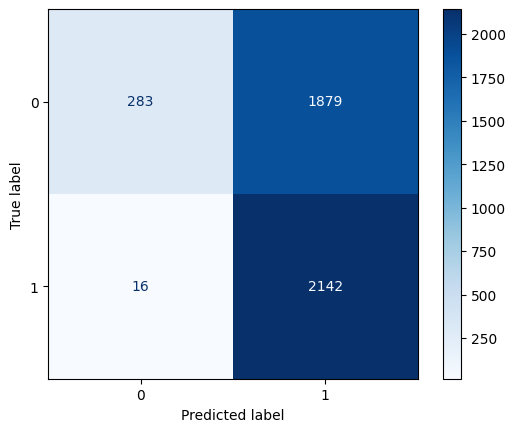

In [ ]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

# Paths
MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Define pretrained models
models = {
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "EfficientNet": EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}


# Function to build model
def build_model(base_model):
    for layer in base_model.layers[:-10]:  # Freeze most of the layers
        layer.trainable = False

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.6)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to train, evaluate and save results
def train_and_evaluate(model_name, base_model, train_generator, val_generator, test_generator):
    print(f"Training {model_name}...")
    model = build_model(base_model)

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )

    # Training
    start_time = time.time()
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,
        callbacks=[early_stopping]
    )
    duration = time.time() - start_time

    # Plot training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(MODEL_SAVE_DIR, f"{model_name}_loss_plot.png"))
    plt.close()

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"{model_name} - Test Accuracy: {test_acc:.4f}, Time: {duration:.2f}s")

    # Save the model
    model.save(os.path.join(MODEL_SAVE_DIR, f"{model_name}.keras"))

    # Find optimal threshold using validation data
    predictions = model.predict(val_generator).flatten()
    precisions, recalls, thresholds = precision_recall_curve(val_generator.classes, predictions)
    optimal_idx = (precisions + recalls - 1).argmax()
    optimal_threshold = thresholds[optimal_idx]

    # Classification report and confusion matrix
    test_predictions = model.predict(test_generator).flatten()
    test_predictions = (test_predictions > optimal_threshold).astype(int)
    true_labels = test_generator.classes

    classification_report_text = classification_report(true_labels, test_predictions, zero_division=1)
    with open(os.path.join(MODEL_SAVE_DIR, f"{model_name}_classification_report.txt"), "w") as f:
        f.write(classification_report_text)

    cm = confusion_matrix(true_labels, test_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap='Blues')
    disp.figure_.savefig(os.path.join(MODEL_SAVE_DIR, f"{model_name}_confusion_matrix.png"))

    return {
        "Test Accuracy": test_acc,
        "Training Time (s)": duration,
        "Optimal Threshold": optimal_threshold
    }

# Training and evaluating all models
results = {}
for model_name, base_model in models.items():
    results[model_name] = train_and_evaluate(model_name, base_model, train_generator, val_generator, test_generator)

# Save results to a CSV
results_df = pd.DataFrame(results).T
results_df.to_csv(os.path.join(MODEL_SAVE_DIR, "model_results.csv"))
print(results_df)


#### ResNet50

### b) Model Tuning Round 1

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Seed
SEED = 42
MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Load and preprocess dataset
df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v4.pkl')
df['label'] = df['label'].astype(str)

# Splitting data: 70% train, 20% test, 10% validation
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED)
val_df, test_df = train_test_split(temp_df, test_size=2/3, random_state=SEED)

# Verify split sizes
print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Testing set: {len(test_df)} samples")


Training set: 15120 samples
Validation set: 2160 samples
Testing set: 4320 samples


In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
# ImageDataGenerator initialization with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)


Found 15120 validated image filenames belonging to 2 classes.
Found 2160 validated image filenames belonging to 2 classes.
Found 4320 validated image filenames belonging to 2 classes.


Training improved ResNet50...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.5672 - loss: 0.8235
Epoch 1: val_loss improved from inf to 0.95524, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/best_resnet50_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 408s 725ms/step - accuracy: 0.5673 - loss: 0.8234 - val_accuracy: 0.4963 - val_loss: 0.9552 - learning_rate: 3.0000e-05
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.6977 - loss: 0.6224
Epoch 2: val_loss improved from 0.95524 to 0.62559, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/best_resnet50_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 310s 646ms/step - accuracy: 0.6977 - loss: 0.6224 - val_accuracy: 0.7023 - val_loss: 0.6256 - learning_rate: 3.0000e-05
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.7338 - loss: 0.5735
Epoch 3: val_loss improved from 0.62559 to 0.59975, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/best_resnet50_model.keras
473/473 ━━━━

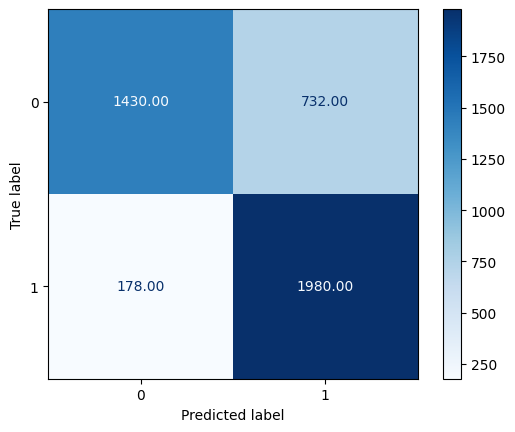

In [ ]:
# Paths

MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Build the ResNet50 model
def build_improved_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = True

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
print("Training improved ResNet50...")
improved_resnet50 = build_improved_resnet50()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    os.path.join(MODEL_SAVE_DIR, "best_resnet50_model.keras"),
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, reduce_lr, checkpoint]

# Train the model
start_time = time.time()
history = improved_resnet50.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)


# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved ResNet50 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_loss_plot.png")
plt.savefig(loss_plot_path)
plt.close()

# Evaluate on test data
test_loss, test_acc = improved_resnet50.evaluate(test_generator)
duration = time.time() - start_time

# Save the final model
improved_resnet50.save(os.path.join(MODEL_SAVE_DIR, "improved_resnet50.keras"))

# Confusion matrix and classification report
predictions = improved_resnet50.predict(test_generator).flatten()
binary_predictions = (predictions > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues', values_format=".2f")
confusion_matrix_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_confusion_matrix.png")
disp.figure_.savefig(confusion_matrix_path)

# Classification Report
report = classification_report(true_labels, binary_predictions, target_names=list(test_generator.class_indices.keys()))
report_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)

# Results summary
print(f"Improved ResNet50 - Test Accuracy: {test_acc:.4f}, Training Time: {duration:.2f}s")
print(report)


### c) Model Tuning Round 2

Training improved ResNet50...
Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.5146 - loss: 0.8883
Epoch 1: val_loss improved from inf to 0.76200, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/R2/best_resnet50_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 361s 649ms/step - accuracy: 0.5147 - loss: 0.8881 - val_accuracy: 0.5384 - val_loss: 0.7620 - learning_rate: 1.0000e-05
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.5981 - loss: 0.7310
Epoch 2: val_loss improved from 0.76200 to 0.69986, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/R2/best_resnet50_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 286s 594ms/step - accuracy: 0.5982 - loss: 0.7309 - val_accuracy: 0.6306 - val_loss: 0.6999 - learning_rate: 1.0000e-05
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.6623 - loss: 0.6614
Epoch 3: val_loss improved from 0.69986 to 0.62602, saving model to /content/drive/MyDrive/DeepFakeDetection/red

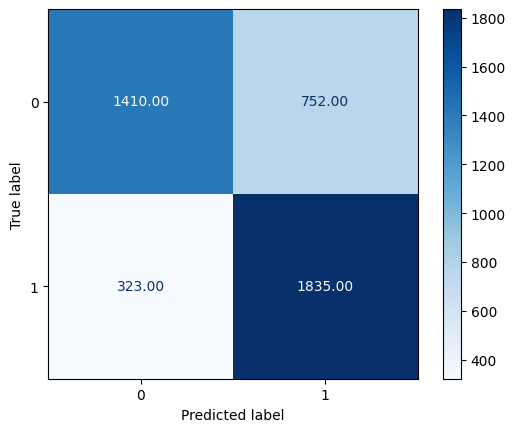

In [ ]:
# Paths

MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models/R2"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Build the ResNet50 model
def build_improved_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:-5]:
        layer.trainable = True

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
print("Training improved ResNet50...")
improved_resnet50 = build_improved_resnet50()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    os.path.join(MODEL_SAVE_DIR, "best_resnet50_model.keras"),
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, reduce_lr, checkpoint]

# Train the model
start_time = time.time()
history = improved_resnet50.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)


# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved ResNet50 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_loss_plot.png")
plt.savefig(loss_plot_path)
plt.close()

# Evaluate on test data
test_loss, test_acc = improved_resnet50.evaluate(test_generator)
duration = time.time() - start_time

# Save the final model
improved_resnet50.save(os.path.join(MODEL_SAVE_DIR, "improved_resnet50.keras"))

# Confusion matrix and classification report
predictions = improved_resnet50.predict(test_generator).flatten()
binary_predictions = (predictions > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues', values_format=".2f")
confusion_matrix_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_confusion_matrix.png")
disp.figure_.savefig(confusion_matrix_path)

# Classification Report
report = classification_report(true_labels, binary_predictions, target_names=list(test_generator.class_indices.keys()))
report_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)

# Results summary
print(f"Improved ResNet50 - Test Accuracy: {test_acc:.4f}, Training Time: {duration:.2f}s")
print(report)


### d) Model Tuning Round 3

Training improved ResNet50...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5144 - loss: 0.8699
Epoch 1: val_loss improved from inf to 0.78841, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/R3/best_resnet50_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 4179s 9s/step - accuracy: 0.5145 - loss: 0.8698 - val_accuracy: 0.5037 - val_loss: 0.7884 - learning_rate: 1.0000e-05
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.5990 - loss: 0.7216
Epoch 2: val_loss improved from 0.78841 to 0.67024, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/R3/best_resnet50_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 323s 673ms/step - accuracy: 0.5991 - loss: 0.7216 - val_accuracy: 0.6681 - val_loss: 0.6702 - learning_rate: 1.0000e-05
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.6608 - loss: 0.6646
Epoch 3: val_loss improved from 0.67024 to 0.60480, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/R3/best_resnet50_model.keras
473/473 

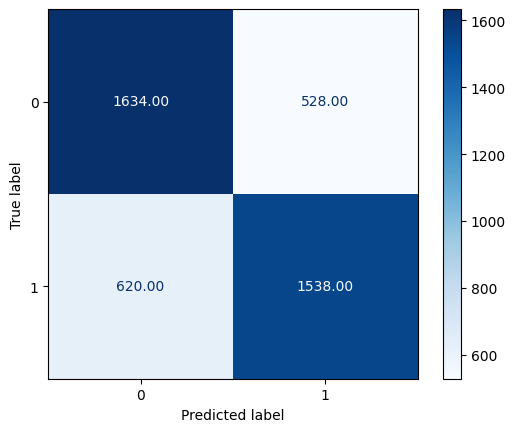

In [ ]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve


MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models/R3"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Build the ResNet50 model
def build_improved_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:-5]:
        layer.trainable = True

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
print("Training improved ResNet50...")
improved_resnet50 = build_improved_resnet50()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    os.path.join(MODEL_SAVE_DIR, "best_resnet50_model.keras"),
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, reduce_lr, checkpoint]

# Train the model
start_time = time.time()
history = improved_resnet50.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)


# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved ResNet50 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_loss_plot.png")
plt.savefig(loss_plot_path)
plt.close()

# Evaluate on test data
test_loss, test_acc = improved_resnet50.evaluate(test_generator)
duration = time.time() - start_time

# Save the final model
improved_resnet50.save(os.path.join(MODEL_SAVE_DIR, "improved_resnet50.keras"))

# Confusion matrix and classification report
predictions = improved_resnet50.predict(test_generator).flatten()
binary_predictions = (predictions > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues', values_format=".2f")
confusion_matrix_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_confusion_matrix.png")
disp.figure_.savefig(confusion_matrix_path)

# Classification Report
report = classification_report(true_labels, binary_predictions, target_names=list(test_generator.class_indices.keys()))
report_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)

# Results summary
print(f"Improved ResNet50 - Test Accuracy: {test_acc:.4f}, Training Time: {duration:.2f}s")
print(report)


### e) Testing - Predict using R2 Model

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/DeepFakeDetection/redo/models/R2/best_resnet50_model.keras')

# Function to preprocess the image for prediction
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)  # Resize to the model's expected input size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Path to the images
fake_image_path = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/585_599_frame6.jpg'
original_image_path = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/585_frame6.jpg'

# Preprocess the images
fake_image = preprocess_image(fake_image_path)
original_image = preprocess_image(original_image_path)

# Predict using the model
fake_prediction = model.predict(fake_image)
original_prediction = model.predict(original_image)

# Output the predictions
print("Prediction for fake image:", fake_prediction)
print("Prediction for original image:", original_prediction)

# Interpret the predictions (assuming binary classification)
# Modify this interpretation based on your model's output format
fake_class = "Fake" if fake_prediction[0] > 0.5 else "Real"
original_class = "Fake" if original_prediction[0] > 0.5 else "Real"

print(f"The model predicts the fake image as: {fake_class}")
print(f"The model predicts the original image as: {original_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for fake image: [[0.6327216]]
Prediction for original image: [[0.49892646]]
The model predicts the fake image as: Fake
The model predicts the original image as: Real


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/DeepFakeDetection/redo/models/R2/best_resnet50_model.keras')

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,329,605 (275.92 MB)

 Trainable params: 24,092,161 (91.90 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 48,184,324 (183.81 MB)

### VGG16

### b) Model Tuning Round 1

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Seed
SEED = 42
MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Load and preprocess dataset
df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v4.pkl')
df['label'] = df['label'].astype(str)

# Splitting data: 70% train, 20% test, 10% validation
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED)
val_df, test_df = train_test_split(temp_df, test_size=2/3, random_state=SEED)

# Verify split sizes
print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Testing set: {len(test_df)} samples")


Training set: 15120 samples
Validation set: 2160 samples
Testing set: 4320 samples


In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
# ImageDataGenerator initialization with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)


Found 15120 validated image filenames belonging to 2 classes.
Found 2160 validated image filenames belonging to 2 classes.
Found 4320 validated image filenames belonging to 2 classes.


Training improved VGG16...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.5116 - loss: 0.7547 
Epoch 1: val_loss improved from inf to 0.71063, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/best_vgg16_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 10952s 23s/step - accuracy: 0.5116 - loss: 0.7547 - val_accuracy: 0.6069 - val_loss: 0.7106 - learning_rate: 3.0000e-05
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.5365 - loss: 0.7245
Epoch 2: val_loss improved from 0.71063 to 0.67702, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/best_vgg16_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 285s 594ms/step - accuracy: 0.5365 - loss: 0.7244 - val_accuracy: 0.6153 - val_loss: 0.6770 - learning_rate: 3.0000e-05
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.5912 - loss: 0.6897
Epoch 3: val_loss improved from 0.67702 to 0.66920, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/best_vgg16_model.keras
473/473 ━━━━━━━━━━━━━━

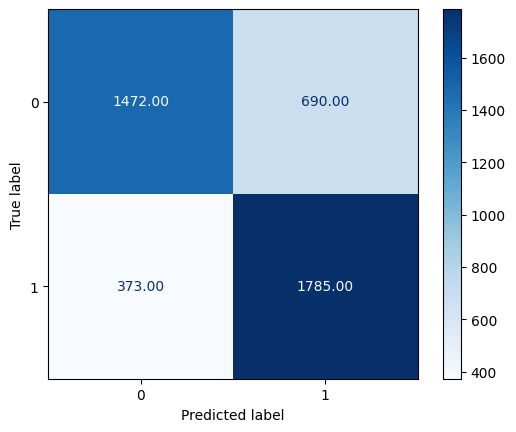

In [ ]:
# Paths

MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Build the VGG16 model
def build_improved_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = True

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
print("Training improved VGG16...")
improved_vgg16 = build_improved_vgg16()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    os.path.join(MODEL_SAVE_DIR, "best_vgg16_model.keras"),
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, reduce_lr, checkpoint]

# Train the model
start_time = time.time()
history = improved_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved VGG16 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_loss_plot.png")
plt.savefig(loss_plot_path)
plt.close()

# Evaluate on test data
test_loss, test_acc = improved_vgg16.evaluate(test_generator)
duration = time.time() - start_time

# Save the final model
improved_vgg16.save(os.path.join(MODEL_SAVE_DIR, "improved_vgg16.keras"))

# Confusion matrix and classification report
predictions = improved_vgg16.predict(test_generator).flatten()
binary_predictions = (predictions > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues', values_format=".2f")
confusion_matrix_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_confusion_matrix.png")
disp.figure_.savefig(confusion_matrix_path)

# Classification Report
report = classification_report(true_labels, binary_predictions, target_names=list(test_generator.class_indices.keys()))
report_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)

# Results summary
print(f"Improved VGG16 - Test Accuracy: {test_acc:.4f}, Training Time: {duration:.2f}s")
print(report)


### c) Model Tuning Round 2

Training improved VGG16...
Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.5313 - loss: 0.7622
Epoch 1: val_loss improved from inf to 0.71041, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/R2/best_vgg16_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 294s 597ms/step - accuracy: 0.5313 - loss: 0.7622 - val_accuracy: 0.6250 - val_loss: 0.7104 - learning_rate: 3.0000e-05
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.5847 - loss: 0.7119
Epoch 2: val_loss improved from 0.71041 to 0.69373, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/R2/best_vgg16_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 282s 587ms/step - accuracy: 0.5847 - loss: 0.7119 - val_accuracy: 0.6181 - val_loss: 0.6937 - learning_rate: 3.0000e-05
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.6124 - loss: 0.6833
Epoch 3: val_loss improved from 0.69373 to 0.65080, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/

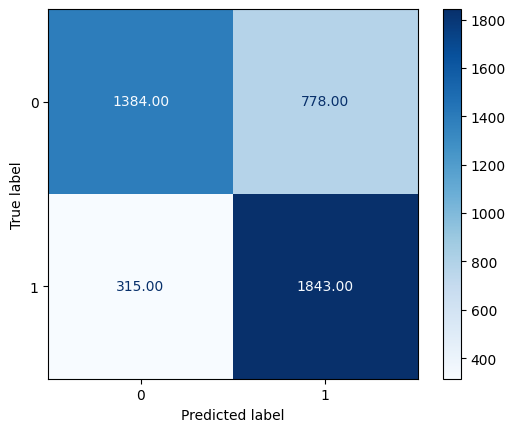

In [ ]:
# Paths

MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models/R2"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Build the VGG16 model
def build_improved_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:-5]:
        layer.trainable = True

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
print("Training improved VGG16...")
improved_vgg16 = build_improved_vgg16()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    os.path.join(MODEL_SAVE_DIR, "best_vgg16_model.keras"),
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, reduce_lr, checkpoint]

# Train the model
start_time = time.time()
history = improved_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved VGG16 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_loss_plot.png")
plt.savefig(loss_plot_path)
plt.close()

# Evaluate on test data
test_loss, test_acc = improved_vgg16.evaluate(test_generator)
duration = time.time() - start_time

# Save the final model
improved_vgg16.save(os.path.join(MODEL_SAVE_DIR, "improved_vgg16.keras"))

# Confusion matrix and classification report
predictions = improved_vgg16.predict(test_generator).flatten()
binary_predictions = (predictions > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues', values_format=".2f")
confusion_matrix_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_confusion_matrix.png")
disp.figure_.savefig(confusion_matrix_path)

# Classification Report
report = classification_report(true_labels, binary_predictions, target_names=list(test_generator.class_indices.keys()))
report_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)

# Results summary
print(f"Improved VGG16 - Test Accuracy: {test_acc:.4f}, Training Time: {duration:.2f}s")
print(report)


### d) Model turning Round 3

Training improved VGG16...
Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.5044 - loss: 0.7679
Epoch 1: val_loss improved from inf to 0.73040, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/R3/best_vgg16_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 294s 597ms/step - accuracy: 0.5044 - loss: 0.7679 - val_accuracy: 0.5796 - val_loss: 0.7304 - learning_rate: 1.0000e-05
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.5504 - loss: 0.7302
Epoch 2: val_loss improved from 0.73040 to 0.66314, saving model to /content/drive/MyDrive/DeepFakeDetection/redo/models/R3/best_vgg16_model.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 281s 586ms/step - accuracy: 0.5505 - loss: 0.7301 - val_accuracy: 0.6389 - val_loss: 0.6631 - learning_rate: 1.0000e-05
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.5814 - loss: 0.7038
Epoch 3: val_loss did not improve from 0.66314
473/473 ━━━━━━━━━━━━━━━━━━━━ 283s 587ms/step - accuracy: 0.5815 - loss: 0.

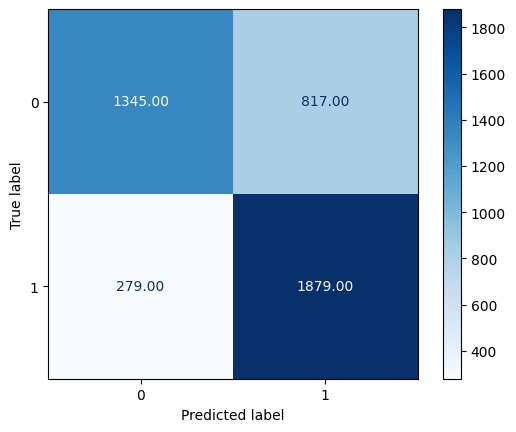

In [ ]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve


MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/redo/models/R3"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Build the VGG16 model
def build_improved_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:-5]:
        layer.trainable = True

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
print("Training improved VGG16...")
improved_vgg16 = build_improved_vgg16()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    os.path.join(MODEL_SAVE_DIR, "best_vgg16_model.keras"),
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, reduce_lr, checkpoint]

# Train the model
start_time = time.time()
history = improved_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved VGG16 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_loss_plot.png")
plt.savefig(loss_plot_path)
plt.close()

# Evaluate on test data
test_loss, test_acc = improved_vgg16.evaluate(test_generator)
duration = time.time() - start_time

# Save the final model
improved_vgg16.save(os.path.join(MODEL_SAVE_DIR, "improved_vgg16.keras"))

# Confusion matrix and classification report
predictions = improved_vgg16.predict(test_generator).flatten()
binary_predictions = (predictions > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues', values_format=".2f")
confusion_matrix_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_confusion_matrix.png")
disp.figure_.savefig(confusion_matrix_path)

# Classification Report
report = classification_report(true_labels, binary_predictions, target_names=list(test_generator.class_indices.keys()))
report_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)

# Results summary
print(f"Improved VGG16 - Test Accuracy: {test_acc:.4f}, Training Time: {duration:.2f}s")
print(report)


# 5. Evaluation

### Cross validation using celeb-df dataset

In [ ]:
## Reorganized the image into real and fake based on the file name
import os
import shutil

# Paths
all_images = '/content/drive/MyDrive/DeepFakeDetection/crossvalidation'
true_folder = '/content/drive/MyDrive/DeepFakeDetection/crossvalidation/organised/Real'
fake_folder = '/content/drive/MyDrive/DeepFakeDetection/crossvalidation/organised/Fake'

# Ensure the target folders exist
os.makedirs(true_folder, exist_ok=True)
os.makedirs(fake_folder, exist_ok=True)

# Loop through all files in the directory
for file_name in os.listdir(all_images):
    file_path = os.path.join(all_images, file_name)
    # Check if it is a file
    if os.path.isfile(file_path):
        if '_label0.jpg' in file_name:
            # Move to true folder
            shutil.move(file_path, os.path.join(true_folder, file_name))
        else:
            # Move to fake folder
            shutil.move(file_path, os.path.join(fake_folder, file_name))

In [ ]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/DeepFakeDetection/redo/models/R2/best_resnet50_model.keras')

# Function to preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Predict and evaluate function
def evaluate_folder(image_folder, label):
    correct = 0
    total = 0
    for file_name in os.listdir(image_folder):
        file_path = os.path.join(image_folder, file_name)
        if os.path.isfile(file_path):
            img_array = preprocess_image(file_path)
            prediction = model.predict(img_array, verbose=0)
            predicted_label = 1 if prediction[0][0] >= 0.5 else 0  # Threshold at 0.5
            if predicted_label == label:
                correct += 1
            total += 1
    accuracy = correct / total if total > 0 else 0
    return accuracy, correct, total

# Evaluate Real and Fake folders
real_accuracy, real_correct, real_total = evaluate_folder(true_folder, label=0)  # Label 0 for real
fake_accuracy, fake_correct, fake_total = evaluate_folder(fake_folder, label=1)  # Label 1 for fake

# Print results
print(f"Real Accuracy: {real_accuracy:.2f} ({real_correct}/{real_total})")
print(f"Fake Accuracy: {fake_accuracy:.2f} ({fake_correct}/{fake_total})")

Real Accuracy: 0.87 (1514/1749)
Fake Accuracy: 0.12 (1315/11288)


In [ ]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Paths
all_images = '/content/drive/MyDrive/DeepFakeDetection/crossvalidation'
true_folder = '/content/drive/MyDrive/DeepFakeDetection/crossvalidation/organised/Real'
fake_folder = '/content/drive/MyDrive/DeepFakeDetection/crossvalidation/organised/Fake'
subset_real_folder = '/content/drive/MyDrive/DeepFakeDetection/crossvalidation/organised_subset/Real'
subset_fake_folder = '/content/drive/MyDrive/DeepFakeDetection/crossvalidation/organised_subset/Fake'

# Ensure the target folders exist
os.makedirs(true_folder, exist_ok=True)
os.makedirs(fake_folder, exist_ok=True)
os.makedirs(subset_real_folder, exist_ok=True)
os.makedirs(subset_fake_folder, exist_ok=True)

# Select 1000 images with 'frame1' in the filename for Real and Fake categories
def select_subset(source_folder, target_folder, max_images=1000):
    count = 0
    for file_name in os.listdir(source_folder):
        if 'frame1' in file_name and count < max_images:
            source_path = os.path.join(source_folder, file_name)
            target_path = os.path.join(target_folder, file_name)
            shutil.copy(source_path, target_path)  # Copy the file to the subset folder
            count += 1
    print(f"Selected {count} images for {target_folder}")

# Create subsets
select_subset(true_folder, subset_real_folder, max_images=1000)
select_subset(fake_folder, subset_fake_folder, max_images=1000)

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/DeepFakeDetection/redo/models/R2/best_resnet50_model.keras')

# Function to preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Predict and evaluate function
def evaluate_folder(image_folder, label, adjust_threshold=False):
    correct = 0
    total = 0
    probabilities = []
    for file_name in os.listdir(image_folder):
        file_path = os.path.join(image_folder, file_name)
        if os.path.isfile(file_path):
            img_array = preprocess_image(file_path)
            prediction = model.predict(img_array, verbose=0)
            probabilities.append(prediction[0][0])
            predicted_label = 1 if prediction[0][0] >= 0.5 else 0  # Initial threshold at 0.5
            if predicted_label == label:
                correct += 1
            total += 1

    accuracy = correct / total if total > 0 else 0
    avg_probability = np.mean(probabilities) if probabilities else 0

    if adjust_threshold:
        return accuracy, correct, total, avg_probability
    return accuracy, correct, total

# Evaluate Real and Fake subsets
real_accuracy, real_correct, real_total = evaluate_folder(subset_real_folder, label=0)  # Label 0 for real
fake_accuracy, fake_correct, fake_total, avg_fake_prob = evaluate_folder(subset_fake_folder, label=1, adjust_threshold=True)  # Label 1 for fake

# Adjust threshold based on average fake probability
threshold = avg_fake_prob
print(f"Adjusted threshold based on average fake probability: {threshold:.2f}")

# Reevaluate with adjusted threshold
def reevaluate_with_threshold(image_folder, label, threshold):
    correct = 0
    total = 0
    for file_name in os.listdir(image_folder):
        file_path = os.path.join(image_folder, file_name)
        if os.path.isfile(file_path):
            img_array = preprocess_image(file_path)
            prediction = model.predict(img_array, verbose=0)
            predicted_label = 1 if prediction[0][0] >= threshold else 0
            if predicted_label == label:
                correct += 1
            total += 1
    accuracy = correct / total if total > 0 else 0
    return accuracy, correct, total

real_accuracy_adjusted, real_correct_adjusted, real_total_adjusted = reevaluate_with_threshold(subset_real_folder, label=0, threshold=threshold)
fake_accuracy_adjusted, fake_correct_adjusted, fake_total_adjusted = reevaluate_with_threshold(subset_fake_folder, label=1, threshold=threshold)

# Print results
print(f"Real Accuracy (Adjusted Threshold): {real_accuracy_adjusted:.2f} ({real_correct_adjusted}/{real_total_adjusted})")
print(f"Fake Accuracy (Adjusted Threshold): {fake_accuracy_adjusted:.2f} ({fake_correct_adjusted}/{fake_total_adjusted})")


Selected 880 images for /content/drive/MyDrive/DeepFakeDetection/crossvalidation/organised_subset/Real
Selected 1000 images for /content/drive/MyDrive/DeepFakeDetection/crossvalidation/organised_subset/Fake
Adjusted threshold based on average fake probability: 0.29
Real Accuracy (Adjusted Threshold): 0.43 (378/880)
Fake Accuracy (Adjusted Threshold): 0.49 (486/1000)


# Determine suitable threshold for deployment

In [ ]:
import os
import tensorflow as tf
import numpy as np
import cv2
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/DeepFakeDetection/redo/models/R2/best_resnet50_model.keras')


# Function to preprocess the image for prediction
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)  # Resize to the model's expected input size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Function to calculate average probability
def calculate_avg_probability(model, image_folder, target_size=(224, 224)):
    probabilities = []
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        if not os.path.isfile(image_path):
            continue  # Skip if not a valid file
        img = preprocess_image(image_path, target_size)
        prediction = model.predict(img)
        probabilities.append(prediction[0][0])  # Assuming single output node
    avg_prob = np.mean(probabilities) if probabilities else 0
    return avg_prob, probabilities

# Path to folders containing fake and original images
fake_images_folder = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face'
original_images_folder = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube'

# Calculate average probabilities
fake_avg_prob, fake_probs = calculate_avg_probability(model, fake_images_folder)
original_avg_prob, original_probs = calculate_avg_probability(model, original_images_folder)

# Output the average probabilities
print(f"Average probability for fake images: {fake_avg_prob}")
print(f"Average probability for original images: {original_avg_prob}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━